<h1 style = "color : Brown"> Bike Sharing Assignment</h1>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

<h2 style = "color : Brown"> Business Goal:</h2>

In this assignment we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<h2 style = "color : Brown"> Importing Necessary Libraries</h2>

In [37]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import random #Using it for generating random values

import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.metrics import r2_score

<h2 style = "color : Brown"> Read the dataset</h2>
We will read the data using read_csv() function of pandas library

In [2]:
df_bike_assignment = pd.read_csv("day.csv",index_col=0)

<h2>Visualizing the Data</h2>

In [3]:
#Looking at the data
df_bike_assignment.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Searching for Missings,type of data and also known the shape of data
df_bike_assignment.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Getting shape of data
df_bike_assignment.shape

(730, 15)

In [6]:
df_bike_assignment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


<h2>Droping all the Unwanted columns</h2>
we will drop all the columns that won't help us with the ML/AI model

In [7]:
df_bike_assignment.drop(['dteday','casual','registered'], axis = 1, inplace= True)

In [8]:
# Looking at the data after removl of columns with null values
df_bike_assignment.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


<h2>Look for missing values in the dataset</h2>

In [9]:
#checking missing values
df_bike_assignment.apply(lambda x: sum(x.isnull()), axis=0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<h2>Plotting the data based on 'cnt' ( count of total rental bikes) column</h2>

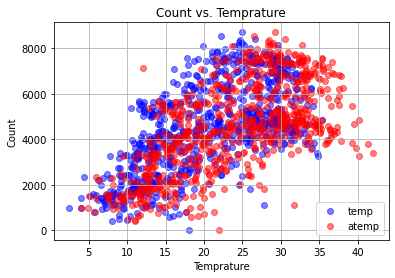

In [10]:
plt.scatter(df_bike_assignment.temp, df_bike_assignment.cnt, color='blue', label='temp', alpha=0.5)
plt.scatter(df_bike_assignment.atemp, df_bike_assignment.cnt, color='red', label='atemp', alpha=0.5)


plt.legend(loc="lower right")
plt.title("Count vs. Temprature")
plt.xlabel("Temprature")
plt.ylabel("Count")
plt.grid()
plt.show()

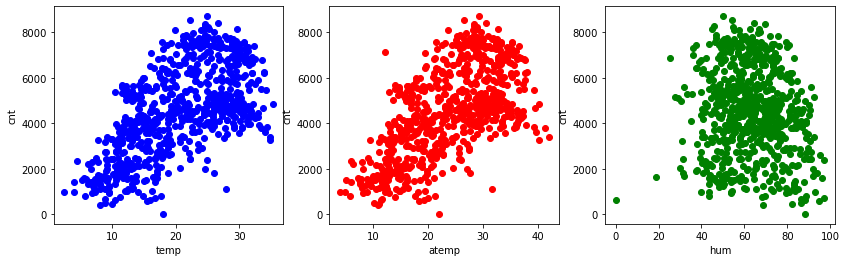

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(df_bike_assignment.temp, df_bike_assignment.cnt, color='blue')
plt.xlabel('temp')
plt.ylabel('cnt')

plt.subplot(1,3,2)
plt.scatter(df_bike_assignment.atemp, df_bike_assignment.cnt, color = 'red')
plt.xlabel('atemp')
plt.ylabel('cnt')

plt.subplot(1,3,3)
plt.scatter(df_bike_assignment.hum, df_bike_assignment.cnt, color = 'green')
plt.xlabel('hum')
plt.ylabel('cnt')


plt.show()

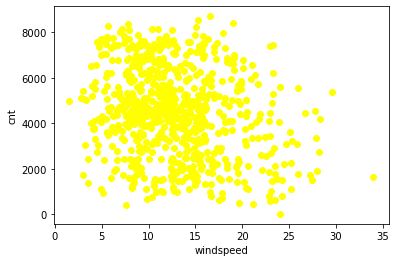

In [12]:
plt.scatter(df_bike_assignment.windspeed, df_bike_assignment.cnt, color = 'yellow')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

<h2>Plotting Categorical Data</h2>

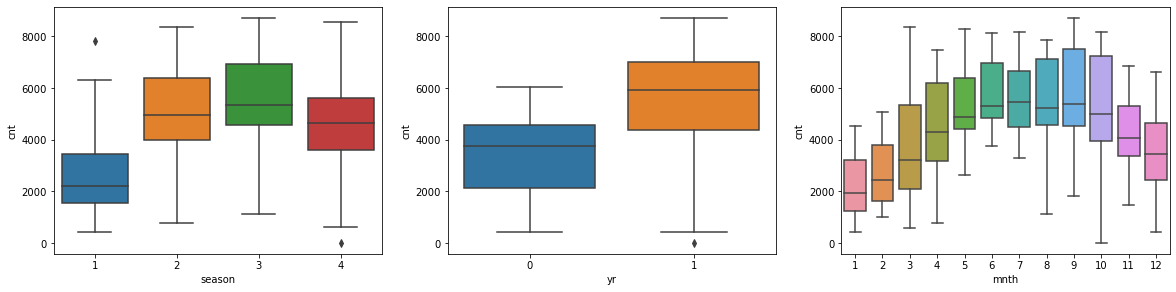

In [13]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'season', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = df_bike_assignment, x= 'yr', y = 'cnt')

plt.subplot(2,3,3)
sns.boxplot(data = df_bike_assignment, x= 'mnth', y = 'cnt')


plt.show()

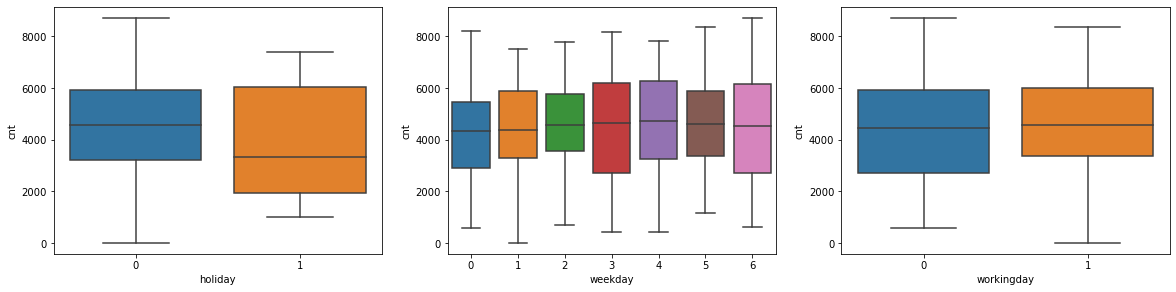

In [14]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'holiday', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = df_bike_assignment, x= 'weekday', y = 'cnt')

plt.subplot(2,3,3)
sns.boxplot(data = df_bike_assignment, x= 'workingday', y = 'cnt')


plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

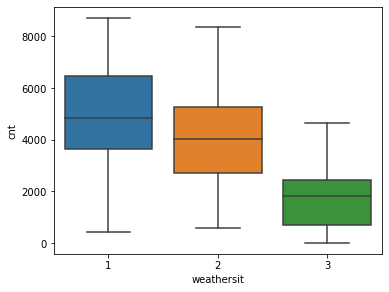

In [15]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'weathersit', y = 'cnt')

<h2>Changing Categorical values to categories</h2>

In [16]:
# df_bike_assignment['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)
# df_bike_assignment['season'].replace({1:'Spring', 2:'Summer', 3:'Monsoon', 4:'Winter'}, inplace = True)
# df_bike_assignment['weathersit'].replace({1:'Sunshine',2:'Fog',3:'Rain'},inplace = True)
# df_bike_assignment['weekday'].replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Satuarday',0:'Sunday'},inplace = True)

In [17]:
#Looking at the data
df_bike_assignment.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<h2>Correlation</h2>
Lets check how these variables are corelated with each other

In [18]:
df_bike_assignment.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<h2>Let’s visualize these numbers using a heatmap.</h2>

<AxesSubplot:title={'center':'Correlation Matrix'}>

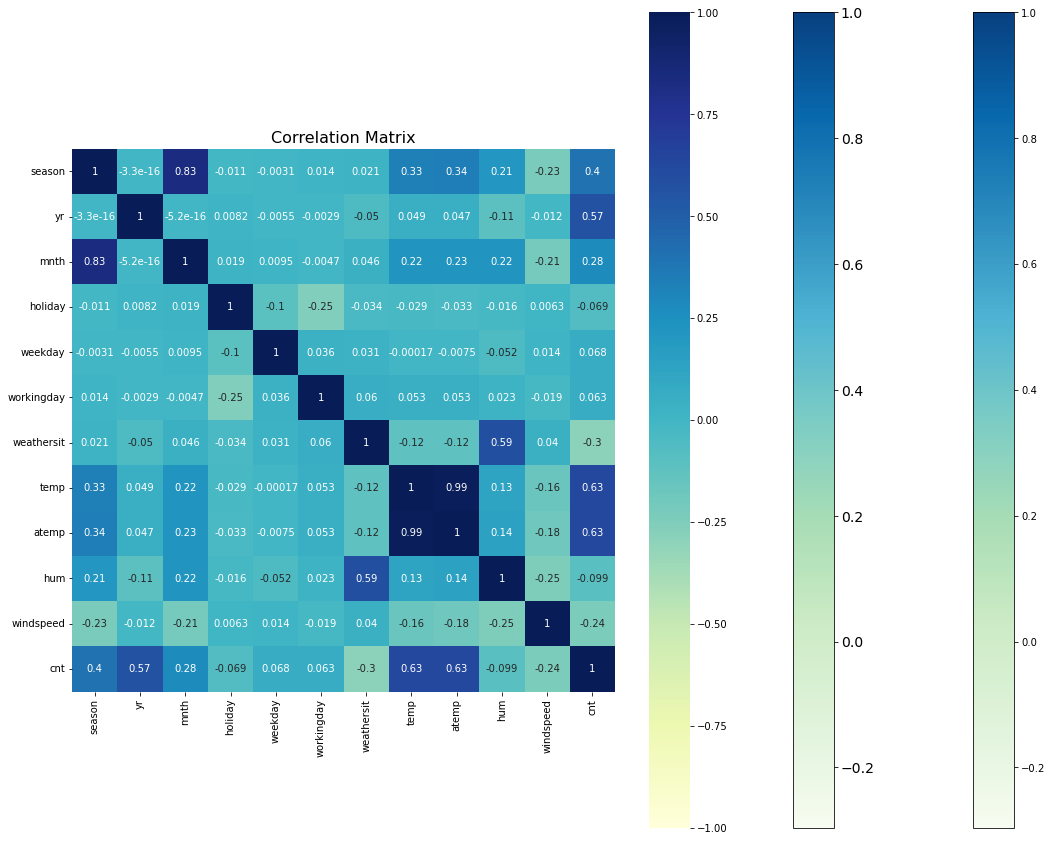

In [19]:
f = plt.figure(figsize=(19, 15))
plt.imshow(df_bike_assignment.corr(), cmap=plt.cm.GnBu,        interpolation='nearest',data=True)
plt.colorbar()
bike_points = [i for i in range(len(df_bike_assignment.columns))]
plt.xticks(bike_points, df_bike_assignment.columns, rotation=45)
plt.yticks(bike_points, df_bike_assignment.columns, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(df_bike_assignment.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

<h2>Split the data in two different sets</h2>
We will split the data in 7:3 ratio

In [20]:
# We have specified random seed so that the train and test data set always have the same number of rows
np.random.seed(0)
df_bike_assignment_train, df_bike_assignment_test = train_test_split(df_bike_assignment, train_size = 0.7, test_size = 0.3, random_state = 100)


In [21]:
# Dividing the training data set into X and Y
y_bike_assignment_train = df_bike_assignment_train.pop('cnt')
X_bike_assignment_train = df_bike_assignment_train

<h2>Adding all the variables to the model</h2>

In [22]:
#Lets Build a linear model


X_train_lm = sm.add_constant(X_bike_assignment_train)

lr_1 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

lr_1.summary()

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.96e-169
Time:                        02:43:06   Log-Likelihood:                -4170.0
No. Observations:                 510   AIC:                             8364.
Df Residuals:                     498   BIC:                             8415.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.6353    285.800      5.702      0.000    1068.113    2191.157
season       418.3085     68.958      6.066      0.000     282.824     553.793
yr          2039.3289     78.187     26.083      0.000    1885.712    2192.946
mnth         -14.0457     21.553     -0.652      0.515     -56.392      28.300
holiday     -598.4634    254.102     -2.355      0.019   -1097.707     -99.220
weekday       69.3069     19.457      3.562      0.000      31.078     107.536
workingday   167.9048     85.196      1.971      0.049       0.517     335.293
weathersit  -703.6255     91.178     -7.717      0.000    -882.766    -524.485
temp          57.3536     36.765      1.560      0.119     -14.880     129.588
atemp         63.0542     34.085      1.850      0.065      -3.914     130.022
hum           -8.4065      3.713     -2.264      0.024     -15.701      -1.112
windspeed    -43.8750      7.996     -5.487      0.000     -59.586     -28.164
==============================================================================
Omnibus:                       64.012   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.857
Skew:                          -0.673   Prob(JB):                     1.29e-32
Kurtosis:                       5.258   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Variance Inflation Factor or VIF</h2>

In [23]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment_train.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment_train.values, i) for i in range(X_bike_assignment_train.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
8,atemp,446.65
7,temp,395.15
9,hum,27.36
0,season,23.88
2,mnth,17.13
6,weathersit,12.62
10,windspeed,5.12
5,workingday,3.16
4,weekday,3.07
1,yr,2.03


<h2>Dropping the variable and updating the model</h2>

<h3>Dropping First Column</h3>

In [24]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('temp', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.13e-169
Time:                        02:43:06   Log-Likelihood:                -4171.2
No. Observations:                 510   AIC:                             8364.
Df Residuals:                     499   BIC:                             8411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1526.4610    278.441      5.482      0.0

C:\Users\bansa\AppData\Local\Temp/ipykernel_28968/62715129.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_bike_assignment = X_bike_assignment_train.drop('temp', 1,)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [25]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
8,hum,26.11
0,season,23.87
2,mnth,17.13
6,weathersit,12.59
7,atemp,10.86
9,windspeed,5.12
5,workingday,3.16
4,weekday,3.07
1,yr,2.03
3,holiday,1.09


<h3>Dropping Second Column</h3>

In [26]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('hum', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.29e-169
Time:                        02:43:06   Log-Likelihood:                -4172.6
No. Observations:                 510   AIC:                             8367.
Df Residuals:                     499   BIC:                             8414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1278.3611    241.020      5.304      0.0

C:\Users\bansa\AppData\Local\Temp/ipykernel_28968/3770867280.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_bike_assignment = X_bike_assignment_train.drop('hum', 1,)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [27]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
8,atemp,411.58
7,temp,377.20
0,season,23.82
2,mnth,16.94
6,weathersit,6.41
9,windspeed,5.07
5,workingday,3.12
4,weekday,3.06
1,yr,2.03
3,holiday,1.08


<h3>Dropping Third Column</h3>

In [28]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('workingday', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.32e-169
Time:                        02:43:06   Log-Likelihood:                -4171.9
No. Observations:                 510   AIC:                             8366.
Df Residuals:                     499   BIC:                             8412.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1745.3166    280.514      6.222      0.0

C:\Users\bansa\AppData\Local\Temp/ipykernel_28968/3321252287.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_bike_assignment = X_bike_assignment_train.drop('workingday', 1,)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [29]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
7,atemp,445.47
6,temp,394.73
8,hum,26.97
0,season,23.86
2,mnth,17.11
5,weathersit,12.60
9,windspeed,5.06
4,weekday,3.07
1,yr,2.02
3,holiday,1.04


<h3>Dropping Forth Column</h3>

In [30]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('holiday', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.27e-169
Time:                        02:43:06   Log-Likelihood:                -4172.8
No. Observations:                 510   AIC:                             8368.
Df Residuals:                     499   BIC:                             8414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1541.0444    284.601      5.415      0.0

C:\Users\bansa\AppData\Local\Temp/ipykernel_28968/3657636344.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_bike_assignment = X_bike_assignment_train.drop('holiday', 1,)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [31]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
7,atemp,446.61
6,temp,395.14
8,hum,27.14
0,season,23.88
2,mnth,17.10
5,weathersit,12.60
9,windspeed,5.07
3,weekday,3.06
4,workingday,3.03
1,yr,2.03


<h2>Residual Analysis of the train data</h2>

C:\Users\bansa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

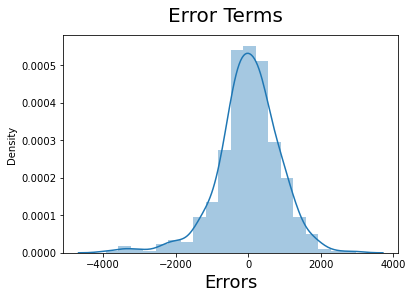

In [32]:
y_bike_assignment_train_cnt = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_bike_assignment_train - y_bike_assignment_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<h2>Making Predictions</h2>

In [33]:
df_bike_assignment_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
185,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,6043
536,2,1,6,0,3,1,1,32.082500,36.04875,59.2083,7.625404,6211
300,4,0,10,0,4,1,2,19.270000,22.85230,81.2917,13.250121,2659
222,3,0,8,0,3,1,1,31.433347,34.24915,42.4167,13.417286,4780
153,2,0,6,0,4,1,1,29.315000,32.19710,30.5000,19.583229,4968
...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,1,2,0,0,0,2,10.899153,13.22605,68.7917,11.791732,2947
703,4,1,12,0,2,1,1,19.509153,23.45270,73.3750,11.666643,6606
128,2,0,5,0,0,0,1,21.661653,25.94665,63.1667,5.000712,4333


In [34]:
features = list(X_bike_assignment.columns)

In [35]:
y_bike_assignment_test = df_bike_assignment_test.pop('cnt')
X_bike_assignment_test = df_bike_assignment_test[features]

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_bike_assignment_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# X_test_m4 = X_test_m4.drop(["temp", "hum", "workingday", "holiday"], axis = 1)


C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
# Making predictions using the final model
y_pred_m4 = lr_2.predict(X_test_m4)

<h2> R² value for the expected test model</h2>

In [38]:
r2_score(y_true = y_bike_assignment_test, y_pred = y_pred_m4)

0.7867211694119394

<h2>Conclusions:</h2>
<ul>
    <li>The R² value for the test data = 0.7867211694119394,</li>
    <li>The R² value for the train data = 0.803;</li>
    
</ul>
 
we can see the value from the final model summary above. 

Since the R² values for both the train and test data are almost equal, the model we built is the best-fitted model.

Data Analysis:-
The features that are profitable for rentals:- 
<ul>
<li>Year</li>
<li>Temp</li>
<li>Working Day</li>
</ul>
The features that are unprofitable for rentals:-
<ul>
<li>Humidity</li>
<li>Weather</li>
<li>Wind Speed</li>
</ul>